In [95]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import json
from datetime import datetime

In [96]:
initial_date = min(time_series.Date)
final_date = datetime(2022,6,30)
total_time_series = pd.DataFrame(index=pd.date_range(initial_date, final_date))
n_window = 45

In [104]:
f = open('data/likes/liked_posts.json')
likes = json.load(f)
likes_list = likes['likes_media_likes']
time_series = pd.DataFrame()
for j in range(len(likes_list)):
    dt_object = datetime.fromtimestamp(likes_list[j]['string_list_data'][0]['timestamp'])
    time_series.loc[j,'Date']=dt_object.date()
    time_series.loc[j,'Likes']=1


for date_reference in total_time_series.index:
    window_left = date_reference.date() - pd.Timedelta(n_window,'days')
    window_right = date_reference.date()
    window = (time_series['Date'] >window_left) &(time_series['Date'] <=window_right) 
    total_time_series.loc[date_reference,'Likes'] =float(time_series[window]['Likes'].sum()/n_window)
    
f = open('data/content/posts_1.json')
posts = json.load(f)

time_series = pd.DataFrame()
for j in range(len(posts)):
    dt_object = datetime.fromtimestamp(posts[j]['media'][0]['creation_timestamp'])
    time_series.loc[j,'Date']=dt_object.date()
    time_series.loc[j,'Posts']=1

for date_reference in total_time_series.index:
    window_left = date_reference.date() - pd.Timedelta(n_window,'days')
    window_right = date_reference.date()
    window = (time_series['Date'] >window_left) &(time_series['Date'] <=window_right) 
    total_time_series.loc[date_reference,'Posts'] =float(time_series[window]['Posts'].sum()/n_window)
    
f = open('data/content/stories.json')
stories = json.load(f)
stories_list = stories['ig_stories']

time_series = pd.DataFrame()
for j in range(len(stories_list)):
    dt_object = datetime.fromtimestamp(stories_list[j]['creation_timestamp'])
    time_series.loc[j,'Date']=dt_object.date()
    time_series.loc[j,'Stories']=1

for date_reference in total_time_series.index:
    window_left = date_reference.date() - pd.Timedelta(n_window,'days')
    window_right = date_reference.date()
    window = (time_series['Date'] >window_left) &(time_series['Date'] <=window_right) 
    total_time_series.loc[date_reference,'Stories'] =float(time_series[window]['Stories'].sum()/n_window)

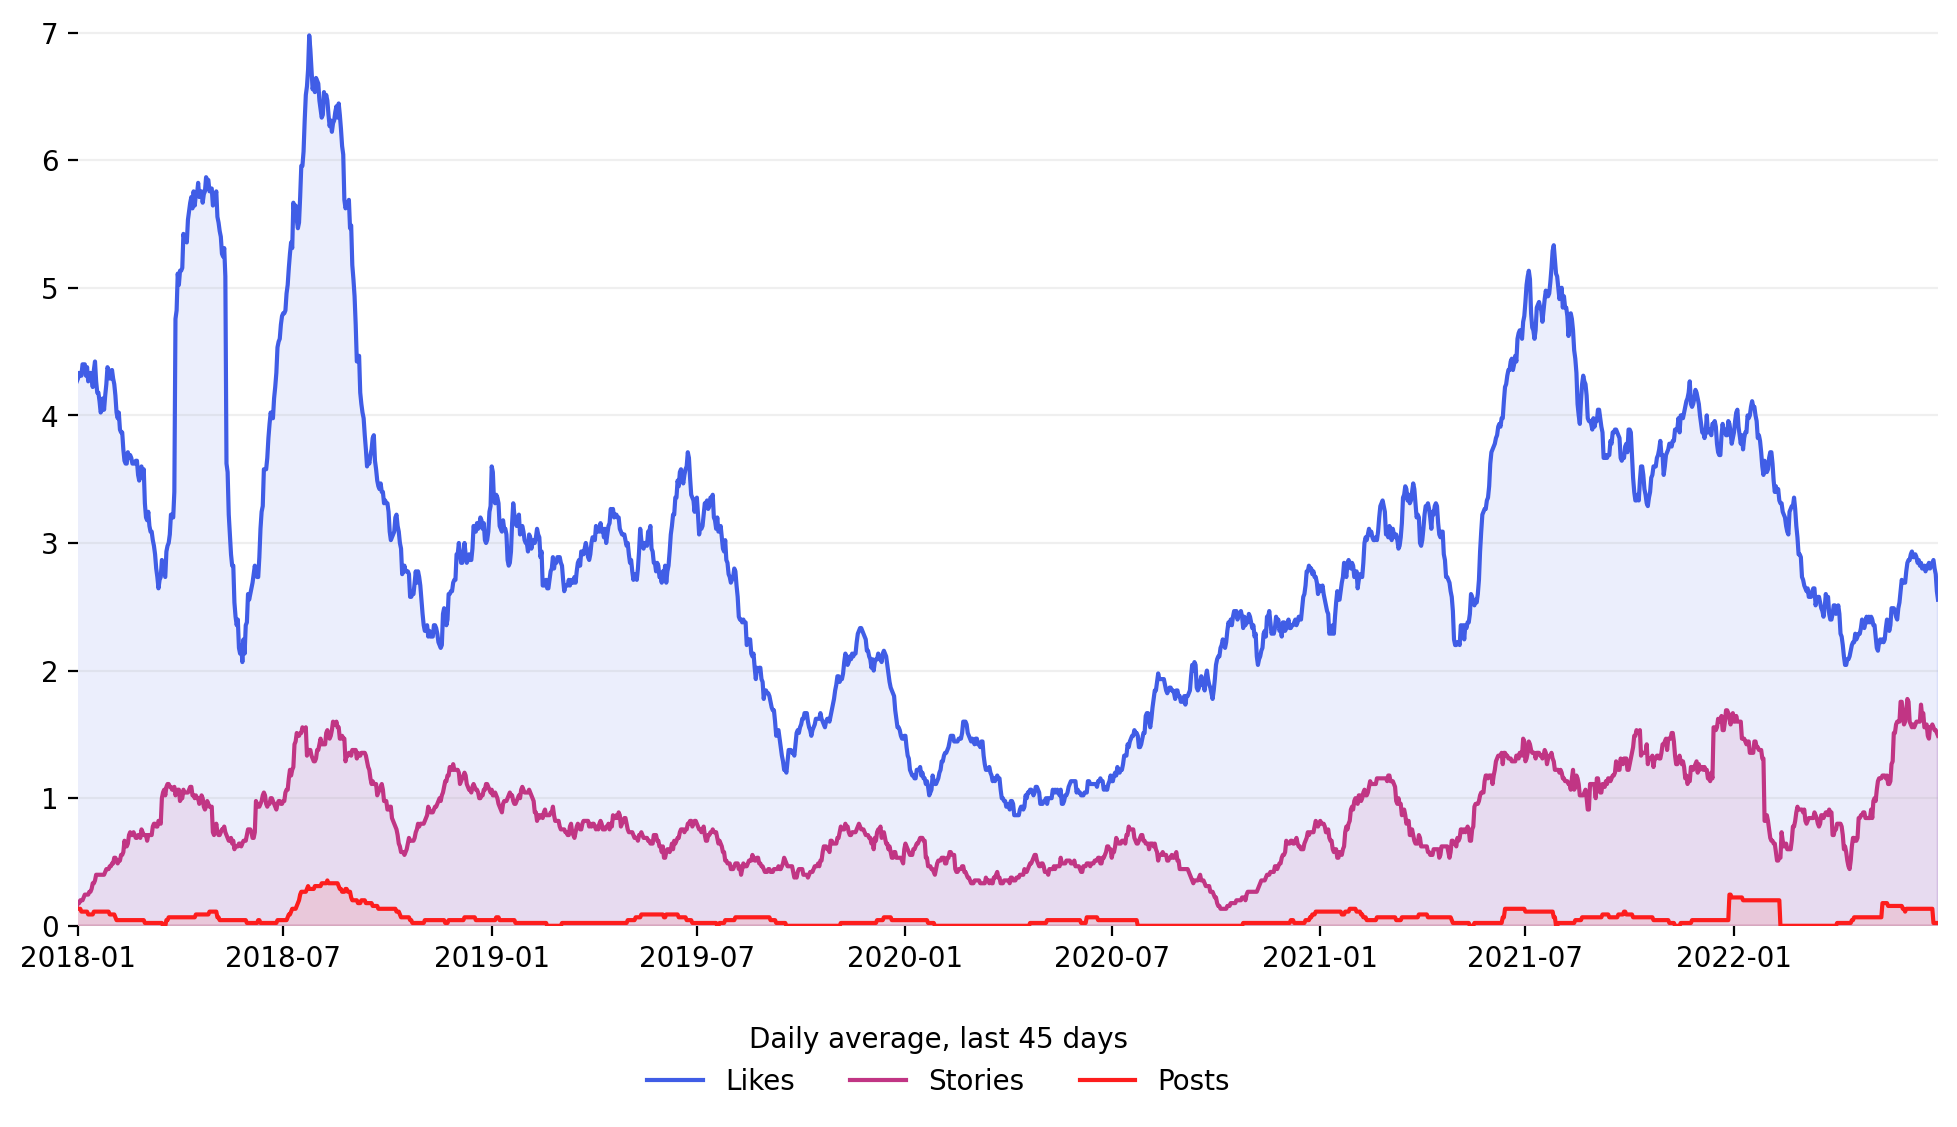

In [142]:
plt.figure(figsize=(12,6),dpi=200)
plt.plot(total_time_series.index,total_time_series['Likes'],color='#405DE6',label='Likes')
plt.fill_between(total_time_series.index,total_time_series['Likes'],alpha=0.1,color='#405DE6')


plt.plot(total_time_series.index,total_time_series['Stories'],color='#C13584',label='Stories')
plt.fill_between(total_time_series.index,total_time_series['Stories'],alpha=0.1,color='#C13584')

plt.plot(total_time_series.index,total_time_series['Posts'],color='#FD1D1D',label='Posts')
plt.fill_between(total_time_series.index,total_time_series['Posts'],alpha=0.1,color='#FD1D1D')


plt.legend(ncol=3,frameon=False,title='Daily average, last 45 days',loc=(0.3,-0.2))
plt.xlim(datetime(2018,1,1),datetime(2022,6,30))
plt.ylim(0,7.1)
plt.grid(axis='y',alpha=0.2)
plt.box(False)